<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/deep-learning/Lab-Work/20221019-Lab-11-MTech-DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

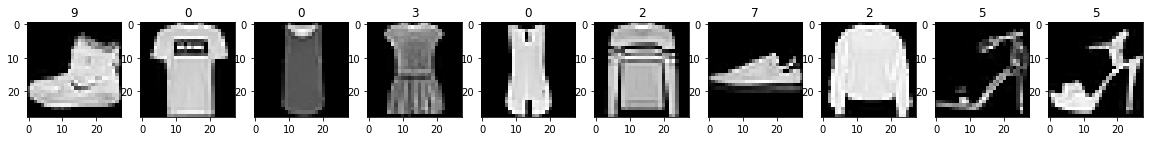

In [3]:
plt.figure(figsize=(20, 8))
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.gray()

plt.show()

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
tf.keras.backend.clear_session()
class AutoEncoder(tf.keras.models.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu')
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(64, )),
            tf.keras.layers.Dense(14 * 14 * 16, activation='relu'),
            tf.keras.layers.Reshape(target_shape=(14, 14, 16)),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AutoEncoder()

In [6]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
Total params: 200,928
Trainable params: 200,928
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 14, 14, 16)        0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 28, 28, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 206,305
Trainable params: 206,305
Non-trainable params: 0
________________________________________________

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
history = autoencoder.fit(x_train, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.2916
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2695
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2659
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2642
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2631
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2624
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2619
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2615
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2611
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2609


In [10]:
encoded = autoencoder.encoder(x_test).numpy()
decoded = autoencoder.decoder(encoded).numpy().reshape(-1, 28, 28)

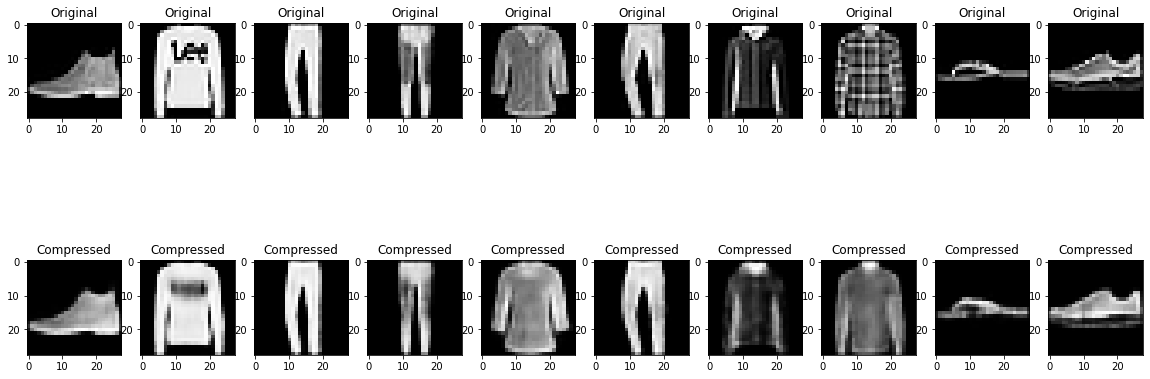

In [11]:
plt.figure(figsize=(20, 8))
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.gray()

    ax = plt.subplot(2, 10, i+1+10)
    plt.imshow(decoded[i])
    plt.title('Compressed')
    plt.gray()

plt.show()

# Image Denoising

In [12]:
from tensorflow.keras.datasets import mnist

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, x_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

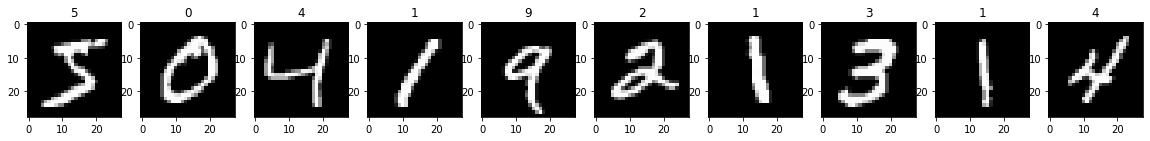

In [14]:
plt.figure(figsize=(20, 8))
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.gray()

plt.show()

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
noise_factor = 0.20
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = np.abs(x_train_noisy)
x_test_noisy = np.abs(x_test_noisy)

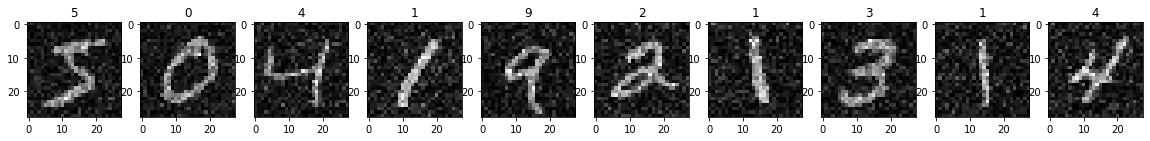

In [17]:
plt.figure(figsize=(20, 8))
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_train_noisy[i])
    plt.title(y_train[i])
    plt.gray()

plt.show()

In [18]:
tf.keras.backend.clear_session()
class AutoEncoder(tf.keras.models.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),

            # LVR - Latent View Representation
            tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        ])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(28, 28, 8)),
            tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AutoEncoder()

In [19]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
Total params: 6,104
Trainable params: 6,104
Non-trainable params: 0
_________________________________________________________________


In [20]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         289       
                                                                 
Total params: 6,097
Trainable params: 6,097
Non-trainable params: 0
_________________________________________________________________


In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
history = autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0824
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0699
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0694
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0692
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0690
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0689
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0689
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0688
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0687


In [23]:
encoded = autoencoder.encoder(x_test).numpy()
decoded = autoencoder.decoder(encoded).numpy().reshape(-1, 28, 28)

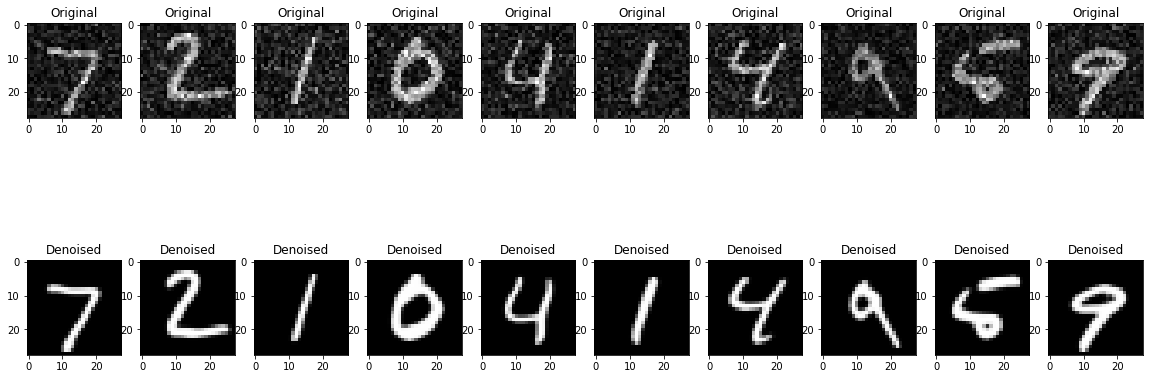

In [25]:
plt.figure(figsize=(20, 8))
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i])
    plt.title('Original')
    plt.gray()

    ax = plt.subplot(2, 10, i+1+10)
    plt.imshow(decoded[i])
    plt.title('Denoised')
    plt.gray()

plt.show()